# Formule brute

In [1]:
d = [1,1,1]
N = 20
for n in range(2, N+1):
    d.append(      sum(   prod( (2^(e[k]) - 1)^(e[k+1])  for k in range( len(e) - 1 )  )   for e in Compositions(n)   ) )

In [2]:
d

[1,
 1,
 1,
 2,
 6,
 26,
 158,
 1330,
 15486,
 249922,
 5604814,
 175056146,
 7628956638,
 464655604898,
 39609038092718,
 4731618937076338,
 792973278284412990,
 186623978752405105282,
 61730172757847094175630,
 28718866772631002557245650,
 18803646723690572815491547038,
 17336342029764198323788395438434]

# Processus itératif

In [3]:
R = PolynomialRing(ZZ, 'x,y,z')

In [4]:
x, y, z = R.gens()

In [5]:
F2 = x^2*y*z
F2

x^2*y*z

In [6]:
F2.subs(y = x, z = 1)

x^3

In [63]:
N = 100
F2 = x^2*y*z
F = F2
for l in range(N):
    F = (F2 + x*z*(F.subs(y = 1).subs(z = 2*y) - F.subs(y = 1).subs(z = y)) + x*z*(F.subs(y = 2*y) - F))

In [99]:
F

x^3*y*z^2 + x^3*y*z + x^2*y*z

Etape 1 (ajout d'un noeud dans le dernier layer)

In [101]:
(x*z*(F.subs(y = 2*y) - F))

x^4*y*z^3 + x^4*y*z^2 + x^3*y*z^2

Etape 2 (création de noeud dans un nouveau layer)

In [100]:
(x*z*(F.subs(y = 1).subs(z = 2*y) - F.subs(y = 1).subs(z = y)))

3*x^4*y^2*z + x^4*y*z + x^3*y*z

Coefficients

In [64]:
G = F.subs(y = 1, z=1) + x + 1

In [65]:
dn = G.coefficients()
dn.reverse()
len(dn)

103

In [67]:
dn

[1,
 1,
 1,
 2,
 6,
 26,
 158,
 1330,
 15486,
 249922,
 5604814,
 175056146,
 7628956638,
 464655604898,
 39609038092718,
 4731618937076338,
 792973278284412990,
 186623978752405105282,
 61730172757847094175630,
 28718866772631002557245650,
 18803646723690572815491547038,
 17336342029764198323788395438434,
 22516842606315079111276915141988462,
 41216149941656368042259088678460774450,
 106360465670155075136864204368282582880766,
 387059894104632659479960328169678142635092290,
 1986863092550208773202967972919604993991443063886,
 14389682376188782389028761073387722034072385881491602,
 147064812633369893069769866676706567006295282871307652958,
 2121389331134011471442399041641170723664711040865274950451746,
 43196459254068460548750470849267218385917284473813212061044032302,
 1241812074822979883752843251974320210895971410825625874651562889787890,
 50407133141897509065755168233446717856415870289539088980384883947650308030,
 288940567774239607291357471853909020415407717480366963867848991561385

In [10]:
[d[i] == dn[i] for i in range(min(len(dn), len(d)))]

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True]

# 103 premiers termes

In [2]:
dn = [1,
      1,
 1,
 2,
 6,
 26,
 158,
 1330,
 15486,
 249922,
 5604814,
 175056146,
 7628956638,
 464655604898,
 39609038092718,
 4731618937076338,
 792973278284412990,
 186623978752405105282,
 61730172757847094175630,
 28718866772631002557245650,
 18803646723690572815491547038,
 17336342029764198323788395438434,
 22516842606315079111276915141988462,
 41216149941656368042259088678460774450,
 106360465670155075136864204368282582880766,
 387059894104632659479960328169678142635092290,
 1986863092550208773202967972919604993991443063886,
 14389682376188782389028761073387722034072385881491602,
 147064812633369893069769866676706567006295282871307652958,
 2121389331134011471442399041641170723664711040865274950451746,
 43196459254068460548750470849267218385917284473813212061044032302,
 1241812074822979883752843251974320210895971410825625874651562889787890,
 50407133141897509065755168233446717856415870289539088980384883947650308030,
 2889405677742396072913574718539090204154077174803669638678489915613852806818818,
 233907245504186020768679920379685528183138011823397866837921287442444016392181796110,
 26744877168926800383020629445068485523294860092723287929885807949111215384042966577196114,
 4319463422645473889325116046465217254509302263654346583131843496833115254071240815201557089054,
 985479563394079818683376502436399597191456507425133010676800657452034831523016321150889155387385570,
 317627850021111203269773757365816398906091173312333593277794071726065882324958783876143475761577355272686,
 144635116205798057838094909849118603974249438404428594678763414326167979039540403376787095782121238363293818802,
 93053552562931161807375484614758794677737444749449694997274816850421124976647335451651528146883259928786434530363774,
 84590798220667776278481449170541985193811610048501345299564506746953927639564719290200257999070021543956451429557868851906,
 108657654713894884815285850041520734720778488218210190853513244709443339931981642002068203466516545533656832182348170729605276110,
 197227808542696988722493511912292926204591051921338160477996166624388267205499480100038529375835673280087108950712494845303801350460434,
 505894159158676556866171604092179411173361167277468192074254193295398126878510249630998197586674840574435040490352486436048162858690136634078,
 1833815948387649043535141076826242566680982090265381201035134335511198119630061426462208072057029749774175580067935924274616761489945664975851786146,
 9394355961007470069721337260537148011085368619321777370285584166984162297168699979183913014027970067098396379153149461596212151883181951653094313082760366,
 68016160731355727103652867677192460073617369163336618434736054559809189391717014916635205579123569556544954607632278455630036036100320683320187855211880291404146,
 695984635810071841147889050542214256883732384646737323921603062548703005017231057276034909999496342560496380254677080796726523811677381706324323390713272109887977842494,
 10065756904195783452159130409535251267230098549038926510405606210186383426688603402723249254141140064307308892464589564189334817977472590889112723996176300970766602090850450818,
 205759260407718319454701118661761289484405226347366106010178280682694872543628304970979665201343076272673262681961099396226536714780402183786850680086306231062997072008308886303974030,
 5945026362535019903086942967820677058319465049891853682922467378309054515280139176291184470326623227784365003702655404767549880122933354603532773140834173444152620175569877628467182633582546,
 242792425319926763051309035362276378392235751678424796705426282487074719945009424116381101150669000961198216165115244598341394978981285282664574987525791959780344846610178707096537863091829235943070,
 14015784741596815690085263016177615729371876701562689109752905771922273345905097392582122941367183437771641400693496694719297313816875175884172548435653786874071248443185727052570171692094408326371268820066,
 1143681150885197138825018525822688024899511389203475858504054481480597541710775714582213905896779138194690128540758601991741870013429079802139184943594046840225775930493079025677273169950781109459267925425247495022,
 131920003915071485676073311389475218363099670301360050735196068084392242148541031351645001323684947536491344467736055290528597250487167921575166703948318291843135586468308958436169451681957179153470460507624408362207770418,
 21509871011728434997569896250849675488544763442404899345941795534741476158796481636494339521319234203810902248733296394702753853278870360581726552397141648387747518756165703887360965274344103721018584948336103702263622004060958974,
 4957906928735077898509643145047212266335439962163984975607755016716567014435110716777254423413536656081653252663073669149747805796864056647861238356717837302845943668705253453625237118062415616043599602845408450702239146046604596430916674,
 1615454732999864896564467582338402433187498421974760024970154847466138213260665591572263013211753190316256065096065742096681912962209770005223520312908329006484452348896898212360156742433290503738066313870173704546089373780821090618564822269448014,
 744111865654983624132682547456261905526965792413270061094446285768296404086622029390122127746661837708351686841543200243449014322819707109725704113524140629289655407863564297589549298355169656607854764092644969234394052530572453853281992210354150271119250,
 484540834200919906382712721134170219918858053027052397499943166767896152753724464789435929513329612786229041010779202202638059378122909906284212349007694133762050171290691951416409400768085065841522501936390992144613835863749632192350925072538710038226859663410782,
 446048121808974103374249874571570156402871723005868099504606537906409749640912026960245102759294575258871513161947467578736404238620590168804596372174869388332576702148034056997579796560854132905471295245230901529460655705210682977528267453958665673352820687574436541246754,
 580488053261557739367798524316886885806388733345854374999870227025480148318916546003750740707740722427025321688501765393717578069487362413390381896596489618810428638168874112925554862943971137177675163966998113646619761360614061618807707800775843802842174234344665329545590689580590,
 1068009120024162643143013851902010889494692268763923851458789252965631704262339551797663553256332887331970009126973097513133646792139447472907508362937061200193660756217722830303255485596309964858059882268098176061551607349503752926938630235154482655833857677500420380181251938033231267227890,
 2777968013415795279712547117520452611034043814786908060241054655553138477761285964718696313590447549902498335031988462594905170798080979234322742529428339470747153114314354850386123638061019925648828831703254584042952530537009287238613527176622211238889826357735324278555140718452869658491800844183230,
 10215496250923282350571764309058090628320686467689132218482957888248151565577903180742363327115256262526780754666965166843051376298060751418964520910156348706266152727202972165810717040735618436288988197066655538969357753179542266809948411122284418261935155897518965672724270240548235230530279604541561920413442,
 53109432146798002977846683958250364516642595475745807043661104651226077743380687137702587020244733020618083506869603768879282907187498737231724604864443592734580686293080804005061567092263238459385323543425588349178930347142835609500291961435626191298823754550459927958280099396074682614833998507692005070140686416324622,
 390366639881400993866010144405868805717049906138050664536287461010891019440526465708702725141787362119720937357287602850221240843876380234460470545352552395920312969341543539349405923637559500658187939823232052393146733568144431310467904547769545613927200868902664213713940054158385978790620500612493873119140125573184690575303506,
 4056599845050370060025435011808360596708517655439537266817647007927079425817239072002150794431122030616342882630740240224414501340629697715359467424693564720152730776458873897050266763906932704072054806261522368096070317627367862318407139398449894323041622671707397791824857329021761645274462250271254219200916735090814457146365861629047326,
 59600316437970835353599136302038038895630422377532019661594240319490436879808625451055099437209857119350422224512271333588247782785896485902533603176670551393571809857684561362725208843439076655164465393215710350498832613635436217726747320552246126885907984275393824916717359963064680558800514666696589835195542484478880184331176793039441069521117666,
 1238029784652453646757133057980165945187007673386073815155559353489010412307728873834638854082268072924946398324145230486473491180320975667667161652072090325586190872633716668949995605979194361909681969254366131202259168378890124603741894021000382187331587197524463304673864122972682412009502825141481290768769293883840748877926141045344416560423131217007121646,
 36359498733148774756473766050418557963120388316543921907421089241183356474552824988076648018175093298721219154233159881504988800876600023247195350492589781764708681382694604370012123024190902341778378529632116196966597027268709961468719114589818188480241804710606068195613507557618410859375877247427413115461071328752031150466282023126879675315178337520477952753258323634,
 1509759686831860692511591573743772250689657723558416856790495592019718573873238041876975294981083801868817309114466002481361046950812621572662019539345481562795202651538264886750420681486757605859255013160940890084326595699293878351798108076169397658064093051215318021174440000871147072202541717397785791665937297467270763928798845717420396454000132289350953288412576855338572171390,
 88635710071293037892476047137407064361680840846175176716324745115502571207019804767842913365777243374485687196073930641096375993123396448525719099555871662550544557312429452336524816963257656462247878385812299065333265592152569450962721667643351876552938908618415635856758901191485295501441360405993879371814578279839900165289112796615386156286983693130485827244034096532654599071088580834754,
 7357312108289008876673653875531452153074943394093404356626097382671979370609718869787960494568814400048659823307806666585864818226994582193905568775646318314757161115416183093935314666316538335234100003751966153938770697872851579585365428266444237414394015800627884033991004390750194145044198537076733794400140485357828530998637202115117588964583573467702191493782726623086705847620525868486882132733134,
 863468949178678909602118715709518024826591400113565466564066875422684752356319109880345663511903264819173473180221394219438330334850914181077281950052329621913075558650670650295775552495274983883828704553334293964885574985555486941261444109019290705391616465133365229976409756853209202805494486453703957545948502734438417620416601558341628722527209125618176783058300738835445090170473532268606099422258737824848658,
 143281356016019792753990370924569665806002133500675946883697080265106293305899701318247569307126443367490728931319731292544274112409581585486218727606748187206968994661243858073515552126543255118672855721725651019615134306002596694465416479199316953970538293021865311032155770141525964576276821821518601390969604331108764604568540602023990164497742138659412549896545231875167173678645959208772913716332296954703672993399458270,
 33616721226147231202982359721434179009875705784962199847287690499555459696671970907011855253705854326963580526753909683130431853782918603353750306496911185320268033313028313777808623408059585095935403957028021896005944522487612091881713591195769481498373121139262424468326595021251232863110272691527125083061276498232110580510800738286311120377773735291116514334620546479409590051303491355628968469455039874196663002239369605923951008418,
 11151719063960300928103044816830667649313676024758216000305580161088236498789479179447968654020525439323389381610979481118190018221535413660149638801399298322861584538638302604552468878167367048235517367165190386235596443907188718215149243950029109550991524176996102396149915468696732413328991352705480609087905034838087617083896194103615440218692421085678347969938371220907950991951327008748004371157014018759684261465012774969866584779164042596270,
 5230656036888261804279403445876054657567249420553459573106530805833817960190893534042328065032813908130533344466301932471478980627578335818831571039897325564582937133396427973951780930526857778728927362009380550156162403995065091579642753975542773472097486050982033358761789413440047063062542444817944473421932014079347525392050874597503791682063228017740249977522101583863986970210440036901055570350698153415859846976790836829375929118435748902023958608435314,
 3468935749301561730858204304814502137165703075220785057661073929904837356312142736143349749185329591536153377162503566019289117017618014119777872145662084723857438246389339171040804880493874017095407879976318045517391887717737106870557721016690330997379510438487665178355223501341147065182122211473709729808704124691565147013983656951438600777041338442659853391771649925169217488798710058928557237370062435309242768314544280116806231874412041893312422034944989647391200830,
 3252887028216280237290803426635752156392696885304062277076658183832398344232907518952948000353542509636512427179841143596323355124279672770972962583754804592760847712459095924378262715042845106645185137000257482248436572197059580636842935750946373454122712192859789093900519660526999252530941151001999437841844505163687658261978932385027465128830038497174436677990566759389429860296259364309580643371607600816204737033663617426815634845073743628306577964158927203224048381583740391554,
 4312926182908942754643959082044443069045109350018323765186133609930468844466994075552469206633694239954215068250674958296137492304061967968897240680114582518939882167281586668279218683040046620338819717837876450995239798582210812497141472712123119018344519323969543103859282352795468285751941001158715298835443699753592266667302209906497395065258090249027471472599997787099429407658638337828852203828175686113889609550005764590134866112317818448016507509162673827065876180311108447587418412768654,
 8085596979549761153562179289109727219769493516318246677937693832609868939249255372322154534629615276223022250370330257929652791131978201618041588608726686462995280854059913430701273332913157559635035478953920905143672110849377118203541384375690269084541228768581987499337615967762864091156344255200171553453094393972641401414400181594862760878427077406777777245213825941529195948808968997116097382413069732430457514871139618532436096635549158972990358540519781099947506250126855171546976888252200936170215122,
 21433184214543087225234688486190707225432692870793279541288520282081411981416378057215606101537322202596875024054553286479827267022889395134378513452035721334832361337130488544557667569494857037937499010033446520134681945696062764969871237077937609568137962639187594811849326465822020201796177507130160219668842338404841043452435891363184878810415535399149846558893793217272769942427717505702558531011995727912740704998218544296204839956898084048292214400068806472479056646014672922415422815970166514196906946556482129310,
 80334553503340883266771137689125628479121431253991460501918006305364876728762823317448039956124474748083560279368959874349503133546454660559800486082543851175666768475377268083672880398633166594483954969725749408086210694606340948927852857863022740526669209271280254971607821105940224717875883625804498562327842475209570818539312506812183030803163279784256845195699789520354442099794725478386807361439639849283236574140111723749552704412362820251414279359985941342806199104927180802006195783773268155823828013881119658257825887442786,
 425751827247056994157136869559820014972741422889154337915276681935411243583812148465555222254867929595683031558051482788088804451263899212936612881313973507283021280145122056875555486215642275170728832369561436325614764128309744424941034916859619111494831893017934946718628420721045728620847725736443726796661944267513906141124347452726880785059932067111725260957828599363838043597106335841922084761753986924942412475386657227204341648528365576095444124962856127638541970418330164552149893026167125945965824865178396834546276470942226287156639342,
 3190476140149262603659761469011257998233646009412792240866245238614710965955577830800908720363243782856559584502190350039614462720158863571756805309956645882117853715072455834303537320697869285010694058611893549739395262845964076537444095614387233899056855958512280706883704857859645647401425344267541647363323798928212196938586837446984979705391375579075993716502300090014892966317296039046247034549079215383534604000252418282701946362168661871343069003348486243522213050164578217598707049536069453458640486246046115298136383098278800264675589542066713548338,
 33806215471007536103779847839397827321485600386036225272365934120765664594230955519021645006614961738526140043521388476975780344815373588212930397598282586043339651563726180884656737911094766784786748362608344453938314383658290699923699607533526840093609782936466216559316623227454708617375619645138476378402500037345200948785079551858398823729184135755175108181759089603832332941282499297410016835051008807335447287789736770332645164185331245753657828254867465312021699113377587896688820065655087859167743291202514911644120270713235175103038204086392348034871387799457790,
 506507577587824483826669138118961179381461177447413993217171530464713166751774646988521517529299372177028061743285715858676060723430985419575939660001041028140400770864929272756663567119203404125108018232434746192009929915622747622262896268995672998491539515538855537741154295969246689120396875666463891338231537229152350569165035821586097639340623001941764391848388862174602602355217944366023191467097122799760094954769505876303178797702752607384415653448529118688264479516364616470770717558382009542188879603992108332554810134801289729775576545921931221876086826985945204817657278274,
 10730520300070196001488423224727970094187047195733478154386933860759141110348076768444230020478827709996857343464511694953719445937125592717808559804799678563871115114339319661438209979816126210336546098571550874197293866302785591672514028287092626393678788618069376941954085546083089441797907047743469389018577175307353214008598662255128365764377905726116426026308910333598914674828743790361509192268810739069576709785565626762647052687080316451954279064494333665406776047619246985042321425122674008558636006880176429764414495354939809578487636283097676561444836687029384412267632480479549154507342,
 321445389194401927253776107689597635308657514968202405649868808523157251637733226740956094089044257604456536432730174759215777092360303796983719556298540383016372414204179620913259341339777100228207708736138881893218524698714380757508952488851495726015219947029161416675229694260997042501872810296273582549160045552555046748784923355137584387021053126309663814751640322741615205141818617245817790701297239900254470107634277416960714938714892971782955106211570247307215047423277348807829046460896260946131432301989300856521084582769983737539480948018098187995259715340945150152128436581100604285280421074303145618,
 13615769716704935174803691781692176709173142691300132903661924771171935304730419195498273910779285113443037112598245463322523859632480380315107114251826526344772739984199204867089307767620845310099483442063508116919845014048162754133070399522433033410614618476964741308637068459701467601749736818741945917857652775169833732798679075566101097534503491872969276911527489441871678783187588729613427952855521852705387657075581508282026590622053662308781812493321160461198847507588744738597504438839943359326887919830586919163329775887017766346427117162352697684264263233217558994183944892963510345149077310652028432278915618274654,
 815514726266208904443497629934601092051156502516761432667115667159521920484266698663279750818980112426533579536050302143249983728484266677480896797473530604316385278731923394336064124969293521268499455321377895703086238068865548485942620571466724092119195838527564508078139302306857885390445989137490503994063133491483324280734360794530920780200966706563396686177113203252717773898566630093128360284038717755099490904033024840187396052923549221102699238203998552130488439593506503550259314649983706139982025961424928560999131200123053391952834014165462617074370341053394871922949420593581505257922000888743375984093329419735543377957656610,
 69067369800643548327407027370474754012428222919258807914501504084936195527215677019355345410123517092105370950607647326394136319149362549522824495784351868122958535633660754973614717731950740808108145653521990298372545863694981772658347617836130837763980422975648874786884280712695122382325264460773192617670276899064547414575696004127200753068104309509972543033025213760773965073921533164258750624050179141590711730355053292048325971252708087792903360807851231798114942196068110998786332893135589762024975164998826162253031453338134125688714026882102917921956368422021558034562856175057955179236044438662945522472290252336984842978589575281268609878318,
 8271256039105194443610338074644879344240451676708106087329843646144365071733663521642902155200582457789245386833133661130024769242781245143621175092170718587842180399314518190184869486089190846207188242194617430908495533964450104622516530544051802198039841862435406407930857680674463303459936087817143089637894147311083136879142851998963200239958944317679260544963063530751099388835963854954508486202484296777937958908642531476708491228424541673366150628169158644374571231136833390051562959073463594176739499846647578382011050011899099183524776784081560914860349987512249661446071292531584338942802346040858987413919592492130199801654957286926801705942903556598585330,
 1400632633479835658404293941555669453773686552636801682377241421367468425956968523073418772996242803955428537884453610325741800614473554123027985062759082838351993460666825423836747717570120334484559347228239771184694100549557534623014210042062413025931750849255098154571597164074766738259544380547959178111163354572438630861672458669642258810897362002939908639745530544135924673288008925616753805639724623265901134186783231268177971792427985935613365146171864549725920503195970533577769855278969051806302473347655437358096406699165185822585036164097917335735970094203442761842706630168834269956887776561501185621274159440958801077822556484529472733204089608861259754871213810169278,
 335379947889630810961513945186062672748841549913345414882510499364804356047915425594786770954532705093616208005486017271887031074803737889864587294279523222475713372741869689503259819097106384169681246668251880760957689543962222300910093963497784809920236609373769690333796663251108410058178594546613314033251247860294594346266003702747714368700645359658738319276851073963385448441421262371326264991629560796251807441197917540447479188715386641432666635678461915845612434298223695584953703301663748145899764574869496988147198246154377211844076792412626485696155206759115990516967230869132118475041959150522715273747054111665258485116776410225427586055364663269968151568008837480779240607664689666,
 113555121498716819891194604647508037575176047631035773466941163762094554526953374074781583707852671116852559880248891556121817718599048561816745297651724315442931542121079593496851312139741920538819323775163008388566843226979993748956192111293583594974627644089169065421266520280645020510791327791331920769281350749303556111699865115767051333990084741201206895336865229234749609678715777395523935075881812918338973329313886017528892313190364641078814505053253212948907932429537169999685032619714926540462832668319482382893386554237774898956453713612687754210542250538260833380263824931401444819059751353243865937622227803027155557822267294581335144366638031580560498393656514975608337177006028503476806283936526,
 54367442681163475227240215560015023264293140778200496748933367207009061178671528226492878262018790992432727319445176278613440207264783488730250831134016075654623909403133105767298254238480818064692735206148874794488003411002882936242402386794456607487960965218230801487993981719667325240314380140658101210117807915914470808962866207897315159258564964120247616218520293638139542658039022792614794126147676167352521591590782286644270270602452033108997690275942783735398630023219013316078135154950519567649084295769709683603566807088598844160236852730531598957889938457896736884422440418091797307144725590064758991768218813992135196323083374262751135154654709208055745131836793238168942957871807613622978276129143473955161496146,
 36806985976580233397276904687449859536602644695515710927476127182269297261330678780636993507524636245021605713664570131017540917961617863509974856816140725059022490800979556519693363682573289228246521595508103869257031524863615754000673056063334162888679020026293235070290316152612396148423449474293339698955440027572499747743869255510311341431268596352506862070684467118260099052762746911214015878464829771182954307770762486491175126837377255305245673000600107039617548593221739236897848723491478614767351048909742331694699788203938739758817111754216361586284103791452472212164946942318590436024470481956061439563876875989147866359523696541674907032679672840354104910972418845021263961722459293608272322507264776167862374756067999862298910,
 35235989022984845035025602350379588916163159014224333202900322941446900796125714401201137733452682220656016388634745833148735754666117192921896233522942831678239980075544929223177704042763254973980642696735572885398346105858531787237447637201497787625789480566056454236975805193111918879144157831758487319663425981218492134854671877473332150958963228355481533669779226264673185752102011641698771573956613208835080709998475341569474437598289064788734800680099520698308839496152145857498771166426263386902542176477307564251499009417468778117837436512355885725390659349712573979463866903878956361249309091253768179959512203653769527354044256567728935777626994463917929511507397816966915196768952377573036294479762513764371761030548464076380553847118927338722,
 47698430529565021719439339260342753516114093597441628024356567609649931932559291838347645064078931331581482206884648606173537335410828560390930148808212369079644258982719643340012099751331835391385427370497778930875691440010884620497191885592770557527576845666321244374114650514615592943045717142938927949023242045650423354636179036379247487866664499698343059844603884367344720306106836329841517805817919632549444875400961642678136869242972484870812123881578852269271116189986866323628289193481848932256616846162763551173633651188696285166404713817328557884864168258810667320975186222227007120290920051808196371763089832015954755760355853018613756866741090159387314629397492612133554295404389148227774253627456411600814102192584321430437360476566244266963174631553992686]

In [2]:
len(dn)

103

# Estimation de l'asymptotique

$\frac{\log(d_n)}{n+1}$

In [3]:
e = [(i, log(dn[i])/(i+1)) for i in range(len(dn))]
len(e)

103

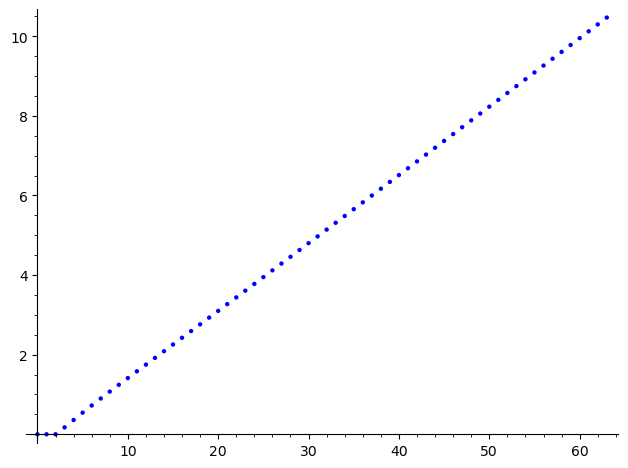

In [4]:
point(e[:64])

In [5]:
[float(e[i][1]) for i in range(60,68)]

[9.953408376726914,
 10.125780676629429,
 10.298176351844148,
 10.470594661579957,
 10.643034578895852,
 inf,
 inf,
 inf]

$\frac{\left( \frac{\log(d_n)}{n+1} \right)}{an + b}$

In [14]:
a = float((e[60][1] - e[10][1])/50)
b = float(e[60][1] - a*60)
a,b

(0.17081519220857241, -0.295503155787431)

In [15]:
float(log(2)/4)

0.17328679513998632

In [16]:
f = [(i, float((log(dn[i])/(i+1)))/(a*i + b)) for i in range(len(dn))]

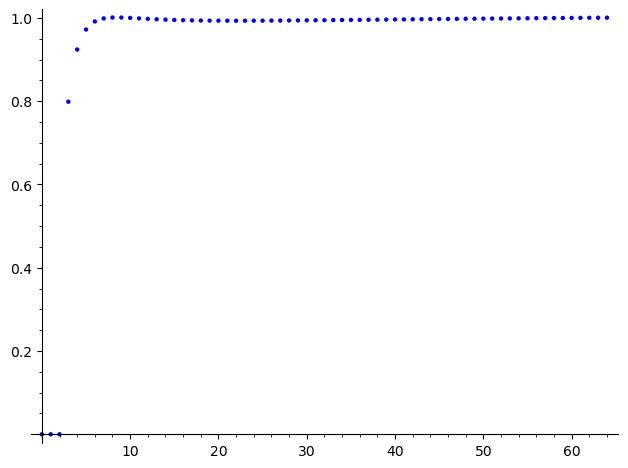

In [17]:
point(f[:65])

In [18]:
a

0.17081519220857241

In [19]:
float(4*a/log(2))

0.9857369228312101

$\log \left(\frac{d_n}{2^{\frac{1}{2}\binom{n+1}{2}}} \right)$

In [30]:
g = [(i, log((dn[i]/(2^(binomial(i+1,2)/2))))) for i in range(len(dn))]

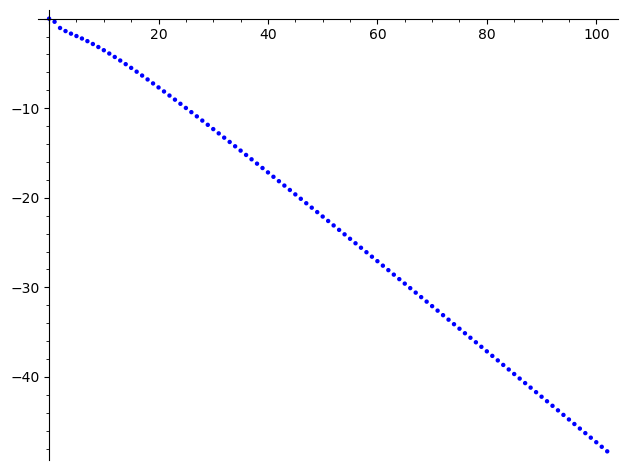

In [31]:
point(g)

$\frac{ \log \left(\frac{d_n}{2^{\frac{1}{2}\binom{n+1}{2}}} \right)}{an + b}$

In [32]:
a2 = float((g[65][1] - g[15][1])/50)
b2 = float(g[65][1]) - a2*65
a2,b2

(-0.4816372916586842, 1.7287723501320613)

In [35]:
h = [(i, log((dn[i]/(2^(binomial(i+1,2)/2))))/(a2*i + b2)) for i in range(len(dn))]

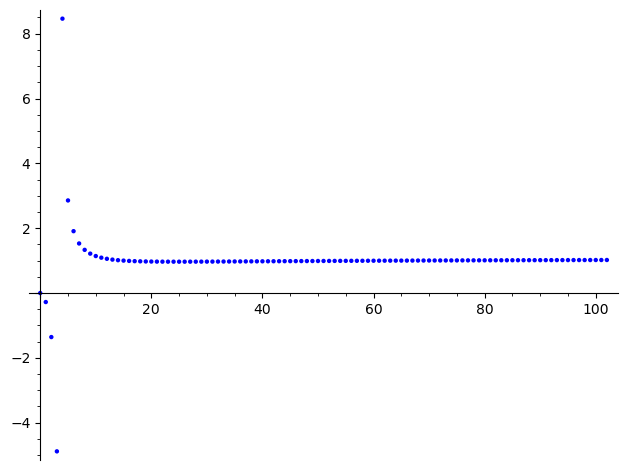

In [36]:
point(h)

In [26]:
a2

-0.4816372916586842

In [27]:
float(a2/log(2)^2)

-1.0024649189539363

In [28]:
float(log(2))

0.6931471805599453

$\frac{d_n}{2^{\frac{1}{2}\binom{n+1}{2} - \log(2)(n+1)}} $

In [33]:
h = [(i,dn[i]/((2^(binomial(i+1,2)/2))*(2^(-log(2)*(i+1))))) for i in range(len(dn))]

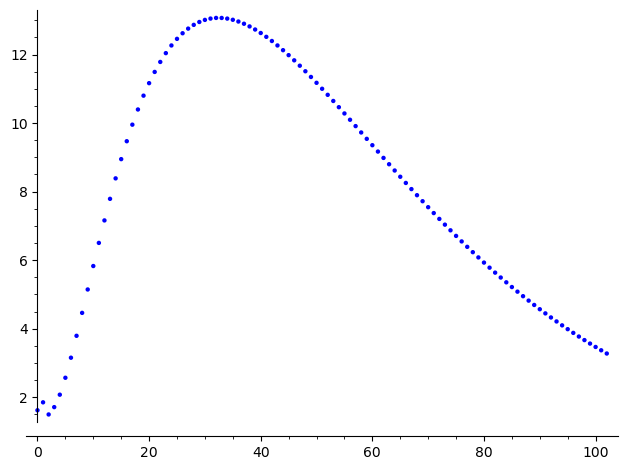

In [34]:
point(h)

In [35]:
float(a2/log(7))

-0.24751260580685397

$\frac{\log \left(\frac{d_n}{2^{\frac{1}{2}\binom{n+1}{2} - \log(2)(n+1)}} \right)}{\log(n)}$

In [37]:
k = [(i,log(h[i][1])/log(i)) for i in range(2,len(dn))]

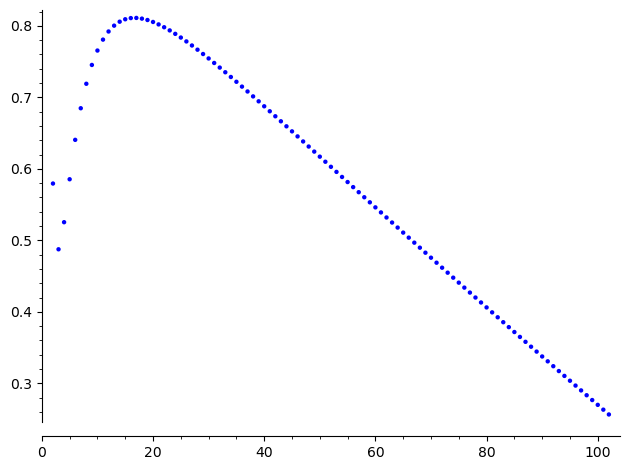

In [38]:
point(k)

In [42]:
a = float((k[100][1] - k[80][1])/20)
b = float(k[100][1]) - a*100
a,b

(-0.006796774728442551, 0.9360769490332275)

In [44]:
float(log(2))

0.6931471805599453

$\frac{\log \left(\frac{d_n}{2^{\frac{1}{2}\binom{n+1}{2}}} \right)}{\log(n+1)}$

In [41]:
l = [(i,log(dn[i]/2^(binomial(i+1,2)/2))/log(i+1)) for i in range(1,len(dn))]

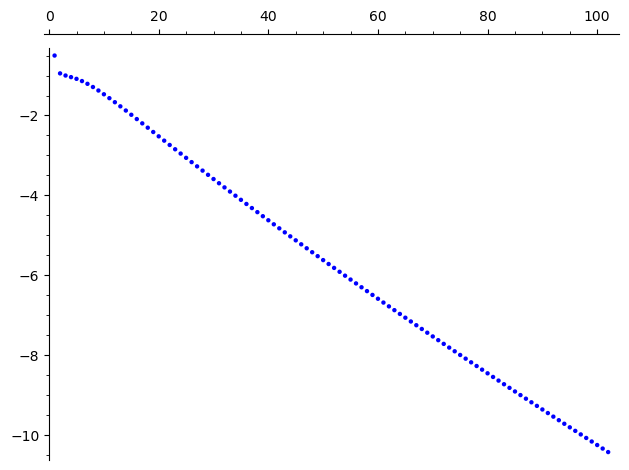

In [42]:
point(l)

In [45]:
a = float((l[100][1] - l[50][1])/50)
b = float(l[100][1]) - a*100
a,b

(-0.09234830065649628, -1.0986188996353832)

In [46]:
exp(a)

0.9117875180415519

In [52]:
float(4*a/log(2))

-0.5329217415666008

In [55]:
f =  [(i,dn[i]*factorial(i)/2^(binomial(i,2))) for i in range(len(dn))]

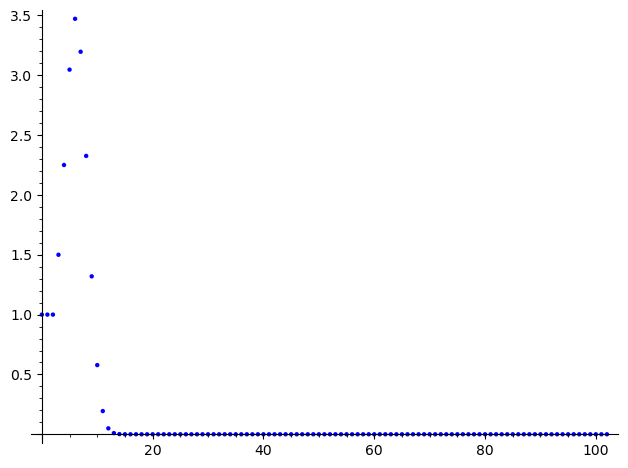

In [56]:
point(f)